# **Heart Disease Prediction using Machine Learning**

# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Read Data set

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
print('shape of dataset before deleting duplicate rows:', df.shape)
df.drop_duplicates()
print('shape of dataset after deleting duplicate rows:', df.shape)

shape of dataset before deleting duplicate rows: (303, 14)
shape of dataset after deleting duplicate rows: (303, 14)


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Summarization

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Renaming columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'depression_level', 'st_slope', 'Result_of_fluoroscopy', 'thalassemia', 'Class']

In [ ]:
df['Class'].value_counts()

1    165
0    138
Name: Class, dtype: int64

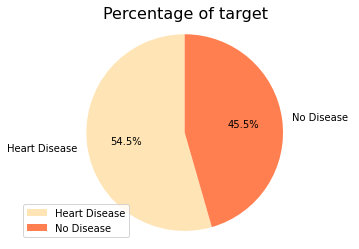

In [ ]:
disease = len(df[df['Class'] == 1])
no_disease = len(df[df['Class']== 0])

y = ('Heart Disease', 'No Disease')
y_pos = np.arange(len(y))
x = (disease, no_disease)
labels = 'Heart Disease', 'No Disease'
sizes = [disease, no_disease]
colors = ['moccasin', 'coral']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90, colors=colors) 
ax1.axis('equal')
plt.title('Percentage of target', size=16)
plt.legend(labels, loc = 'lower left')
plt.show()

The dataset is balanced.

# Exploratory Data Analysis (EDA)

### Missing Values

In [ ]:
for x in df.columns:
    print("Number of missing values in ", x, df[df[x] == '?'].shape[0])

Number of missing values in  age 0
Number of missing values in  sex 0
Number of missing values in  chest_pain_type 0
Number of missing values in  resting_blood_pressure 0
Number of missing values in  cholesterol 0
Number of missing values in  fasting_blood_sugar 0
Number of missing values in  rest_ecg 0
Number of missing values in  max_heart_rate_achieved 0
Number of missing values in  exercise_induced_angina 0
Number of missing values in  depression_level 0
Number of missing values in  st_slope 0
Number of missing values in  Result_of_fluoroscopy 0
Number of missing values in  thalassemia 0
Number of missing values in  Class 0


# Visualization for understanding and analyzing the distribution of data for different variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fca1a2e9610>,
      dtype=object)

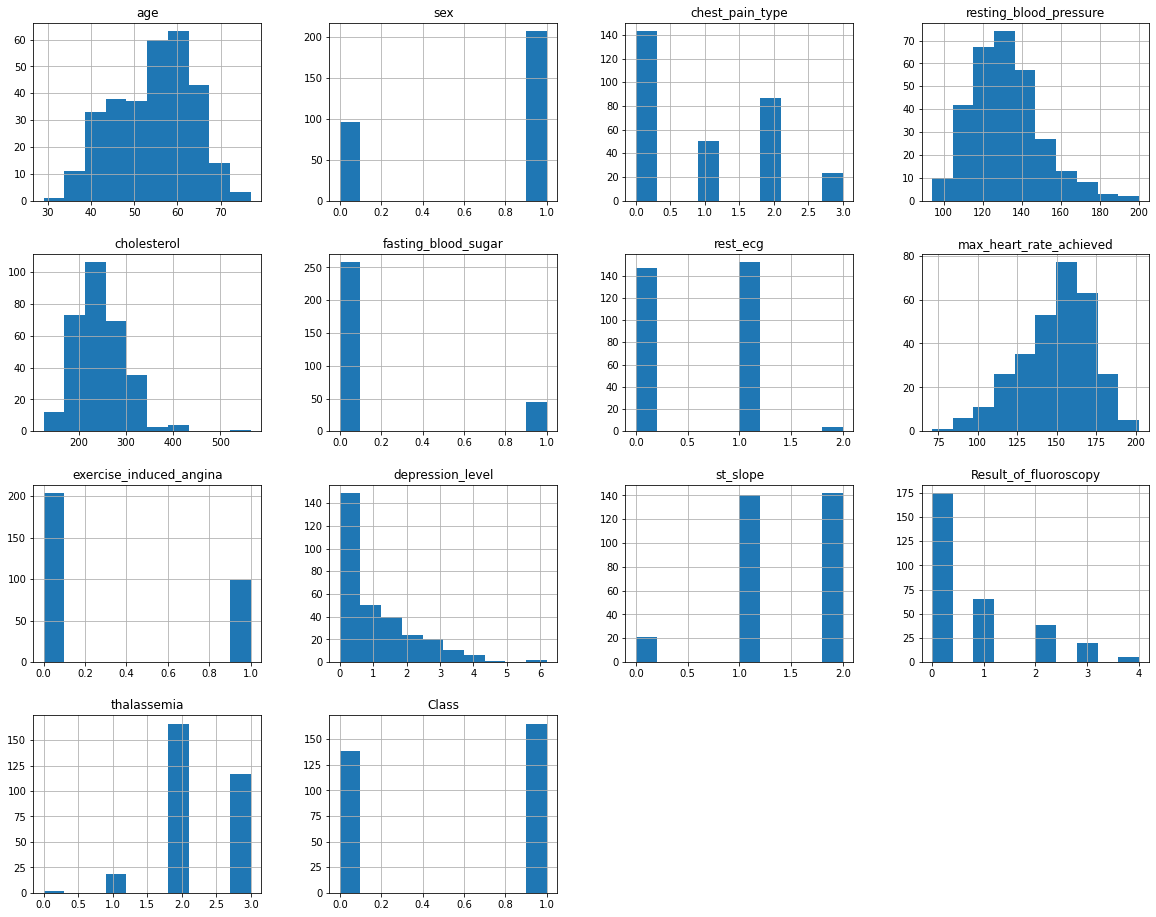

In [ ]:
df.hist(figsize = (20,16),grid=True)

# Class: (1 for disease, 0 for no disease)

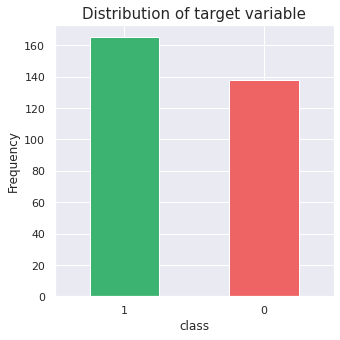

In [ ]:
sns.set(style="darkgrid")
df.Class.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('class',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

#Sex: (0 for Female, 1 for Male)

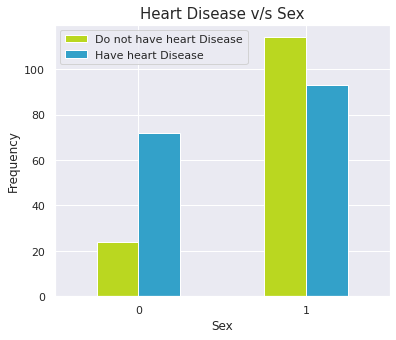

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.sex,df.Class).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

Males are more prone to heart diseases than females.

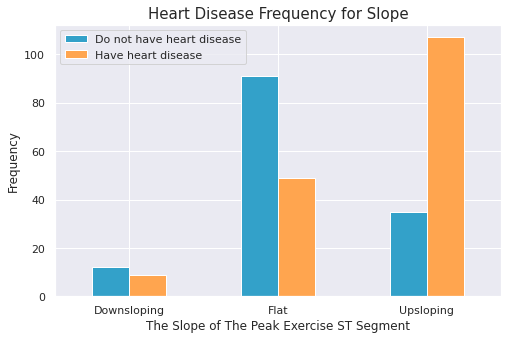

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.st_slope, df.Class).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping","Flat","Upsloping"])
plt.ylabel("Frequency",fontsize=12)
plt.show()

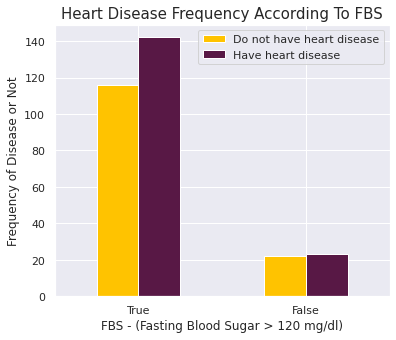

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.fasting_blood_sugar, df.Class).plot(kind="bar", figsize=(6,5), color=["#FFC300", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

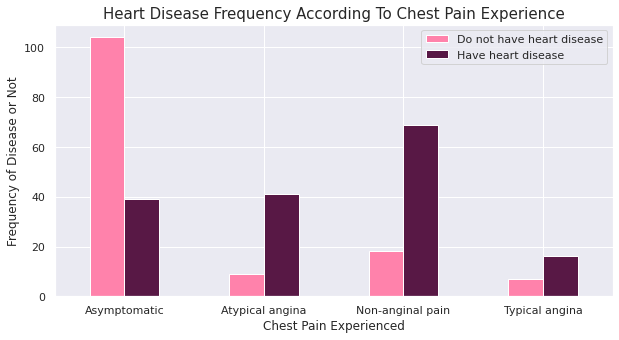

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.chest_pain_type, df.Class).plot(kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

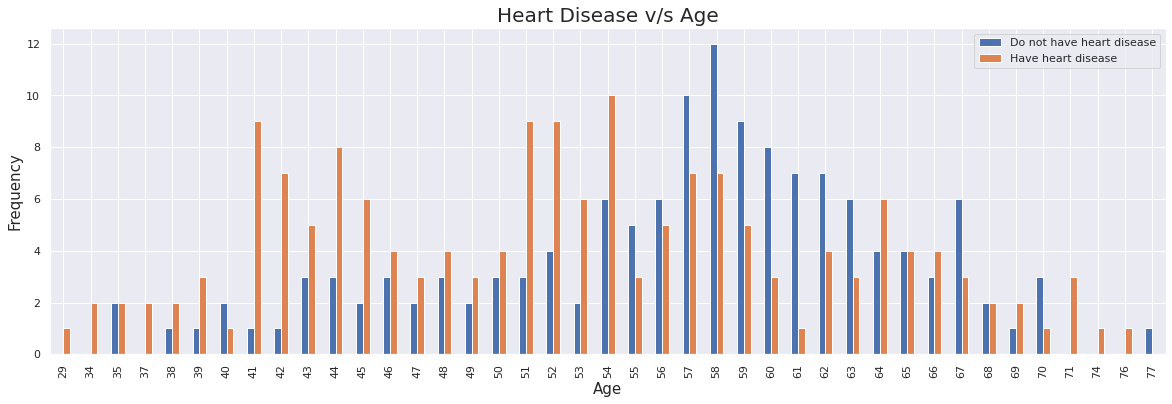

In [ ]:
sns.set(style="darkgrid")
pd.crosstab(df.age, df.Class).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

# Multivariate Analysis

<Figure size 1152x720 with 0 Axes>

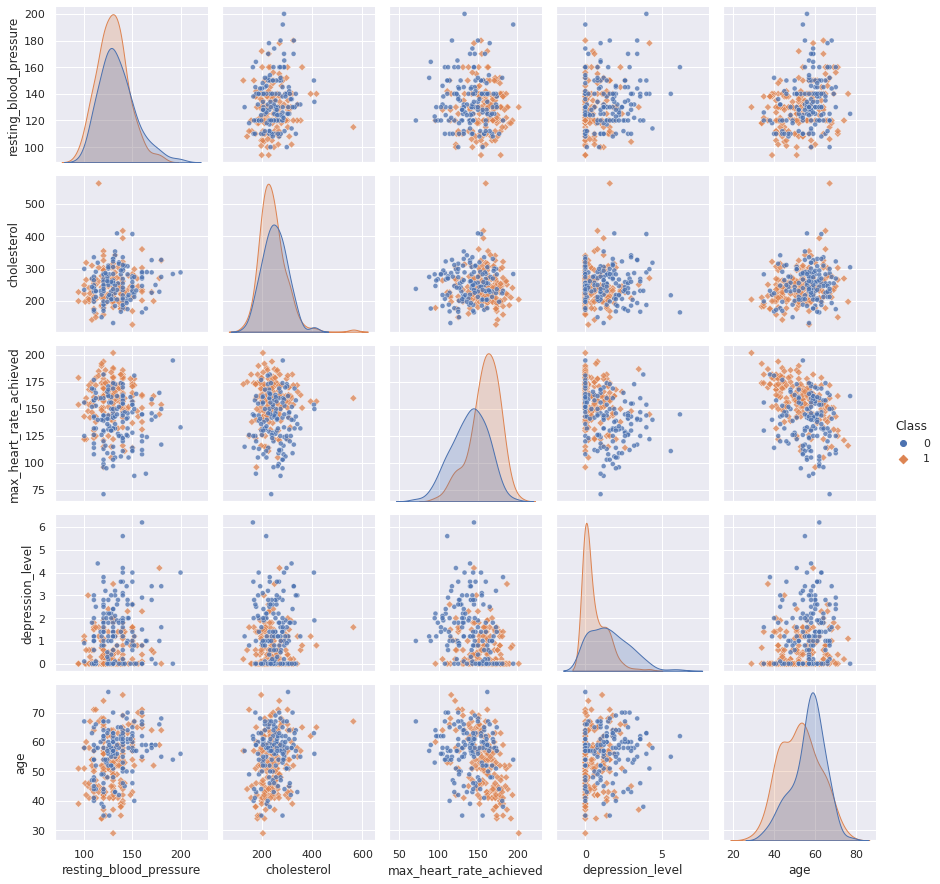

In [ ]:
plt.figure(figsize=(16, 10))
sns.pairplot(df[['resting_blood_pressure','cholesterol','max_heart_rate_achieved','depression_level','age', 'Class']], hue='Class',
           markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

# **Classification Methods**

# Feature Selection

In [ ]:
X = df.drop('Class',1)
y = df['Class']
print('shape of X and y :', X.shape, y.shape)

shape of X and y : (303, 13) (303,)


<ipython-input-18-1a9d25cfa023>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('Class',1)


# Splitting Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('shape of X and y (train) :', X_train.shape, y_train.shape)
print('shape of X and y (test) :', X_test.shape, y_test.shape)

shape of X and y (train) : (242, 13) (242,)
shape of X and y (test) : (61, 13) (61,)


In [ ]:

#nominal=list(set(cols) - set(numeric))
X_y_train = pd.concat([X_train, y_train], axis=1)
num_outlier = np.zeros(X_y_train.shape[0])

j=-1
for col in X_y_train.columns:

    j+=1

    data=X_y_train[col].dropna()
    
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    i=-1
    outlier=[]
    for x in data:
      
        

        i+=1

        if (x > up_lim):

            outlier.append(x)
            num_outlier[i]+=1
   

        elif (x < low_lim):
          
            outlier.append(x)
            num_outlier[i]+=1
            
      
   

    print(' outlier in the feature \''+col + '\' is',low_lim, up_lim)

print('number of outlier for samples is',num_outlier)
#if (np.sum(num_outlier, axis=1)>1).sum()>=1:

print('\nthere are',(num_outlier>1).sum() ,'rows with more than 1 outlier feature but because of lack of data so we do\'nt delete this rows')
'''X_train=X_train[num_outlier<=1]
y_train=y_train[num_outlier<=1]'''


 outlier in the feature 'age' is 28.5 80.5
 outlier in the feature 'sex' is -1.5 2.5
 outlier in the feature 'chest_pain_type' is -3.0 5.0
 outlier in the feature 'resting_blood_pressure' is 90.0 170.0
 outlier in the feature 'cholesterol' is 106.5 380.5
 outlier in the feature 'fasting_blood_sugar' is 0.0 0.0
 outlier in the feature 'rest_ecg' is -1.5 2.5
 outlier in the feature 'max_heart_rate_achieved' is 87.25 213.25
 outlier in the feature 'exercise_induced_angina' is -1.5 2.5
 outlier in the feature 'depression_level' is -2.625 4.375
 outlier in the feature 'st_slope' is -0.5 3.5
 outlier in the feature 'Result_of_fluoroscopy' is -1.5 2.5
 outlier in the feature 'thalassemia' is 0.5 4.5
 outlier in the feature 'Class' is -1.5 2.5
number of outlier for samples is [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 2. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0

'X_train=X_train[num_outlier<=1]\ny_train=y_train[num_outlier<=1]'

In [ ]:
accuracies = {}

# Random Forrest Classifier

In [ ]:
max_accuracy = 0


for x in range(400):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

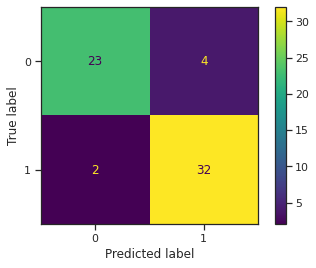

In [ ]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)

plt.show()

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.94      0.89      0.91        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
accuracy_rf=round(accuracy_score(y_pred, y_test)*100,2)
print('Precision:',round(precision_score(y_pred, y_test),4))
print('Recall:',round(recall_score(y_pred, y_test),4))
print('F1_score:',round(f1_score(y_pred, y_test),4))
print('Accuracy:',str(round(accuracy_score(y_pred, y_test)*100,2))+'%')
accuracies['Random Forest'] = accuracy_score(y_pred, y_test)*100

Precision: 0.9412
Recall: 0.8889
F1_score: 0.9143
Accuracy: 90.16%


# Decision Tree Classifier

In [ ]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

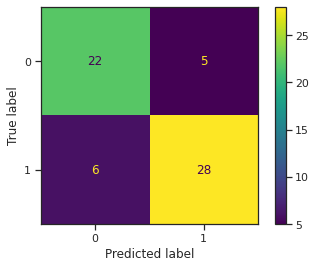

In [ ]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.85      0.82      0.84        34

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
accuracy_dt=round(accuracy_score(y_test, y_pred)*100,2)
print('Precision:',round(precision_score(y_test, y_pred),4))
print('Recall:',round(recall_score(y_test, y_pred),4))
print('F1_score:',round(f1_score(y_test, y_pred),4))
print('Accuracy:',str(round(accuracy_score(y_test, y_pred)*100,2))+'%')

Precision: 0.8485
Recall: 0.8235
F1_score: 0.8358
Accuracy: 81.97%


In [ ]:
accuracies['Decision Tress'] = accuracy_score(y_test, y_pred)*100

# Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# getting the training Set Predictions
y_train_pred = lr.predict(X_train)

# getting the test Set Predictions
y_test_pred = lr.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


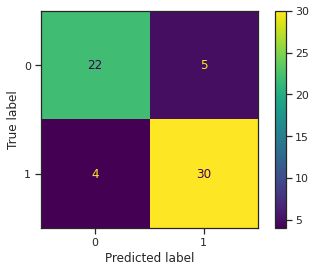

In [ ]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        98
           1       0.91      0.83      0.87       144

    accuracy                           0.85       242
   macro avg       0.84      0.85      0.84       242
weighted avg       0.85      0.85      0.85       242



In [ ]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        26
           1       0.88      0.86      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_test_pred))
print('Recall: %.3f' % recall_score(y_test, y_test_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))
print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred))

Precision: 0.857
Recall: 0.882
F1 Score: 0.870
Accuracy: 0.8525


In [ ]:
accuracies["Logistic Regression"] = accuracy_score(y_test, y_test_pred)*100

# Naive Bayes

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_train_pred2 = nb.predict(X_train)
y_test_pred2 = nb.predict(X_test)


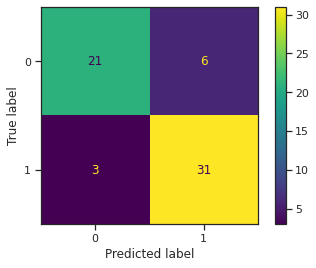

In [ ]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

plt.show()

In [ ]:
print(classification_report(y_train_pred2,y_train))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.87      0.83      0.85       137

    accuracy                           0.83       242
   macro avg       0.83      0.84      0.83       242
weighted avg       0.84      0.83      0.84       242



In [ ]:
print(classification_report(y_test_pred2,y_test))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        24
           1       0.91      0.84      0.87        37

    accuracy                           0.85        61
   macro avg       0.84      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_test_pred2))
print('Recall: %.3f' % recall_score(y_test, y_test_pred2))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred2))
print('Accuracy: %.4f' % accuracy_score(y_test, y_test_pred2))

Precision: 0.838
Recall: 0.912
F1 Score: 0.873
Accuracy: 0.8525


In [ ]:
accuracies["Naive Bayes"] = accuracy_score(y_test, y_test_pred2) * 100

# Model Comparison

<Figure size 720x480 with 0 Axes>

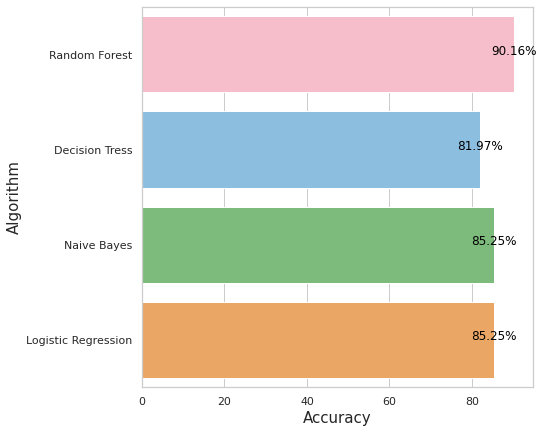

In [ ]:
colors = ["#FFB5C5", "#7EC0EE", "#71C671", "#FFA54F", "#EEDC82", "#AB82FF"]

sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), palette=colors, orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()